# 숫자 순차열 데이터 예측 Template

# 데이터 준비

In [38]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

숫자열이 1개라도 2차원 배열에 답는다. 

In [39]:
numbers = np.zeros((2000,1))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))

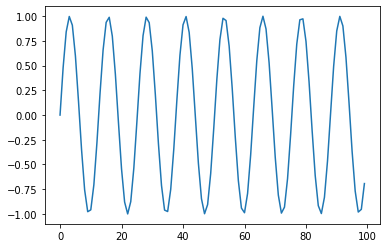

In [40]:
plt.plot(numbers[:100,0])
plt.show()

In [41]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

12345678901234567890의 숫자열로 다음의 입출력 데이터를 생성한다.
```
12345 -> 6
23456 -> 7
34567 -> 8
...
56789 -> 0
```

In [42]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [43]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [44]:
print(raw_x[0])

[[0.        ]
 [0.47942554]
 [0.84147098]
 [0.99749499]
 [0.90929743]]


In [45]:
print(x.shape)
print(y.shape)

(1994, 5, 1)
(1994, 1)


In [46]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 1)
(1994, 1)
Training Data:
(1794, 5, 1)
(1794, 1)
Test Data:
(200, 5, 1)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[-0.15862267]
 [-0.61256015]
 [-0.91652155]
 [-0.9960865 ]
 [-0.83177474]]

train_y[0]
 [-0.46381552]


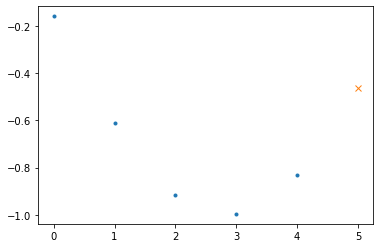

In [47]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')
plt.show()

# DNN 사용

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 5)                 0         
                                                                 
 dense_27 (Dense)            (None, 10)                60        
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


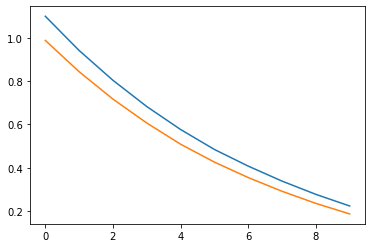

7/7 [==============================] - 0s 3ms/step - loss: 0.1905 - mae: 0.3805
loss= 0.19049155712127686
mae= 0.38054630160331726
(200, 1)
(200, 1)


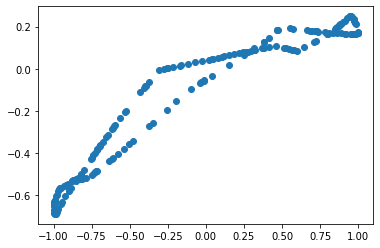

In [48]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
print(test_y.shape)
print(y_.shape)
plt.scatter(test_y.squeeze(), y_)
plt.show()

# Template

## LSTM

In [49]:
print(train_x.shape)

(1794, 5, 1)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 128)               66560     
                                                                 
 flatten_12 (Flatten)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 67,861
Trainable params: 67,861
Non-trainable params: 0
_________________________________________________________________


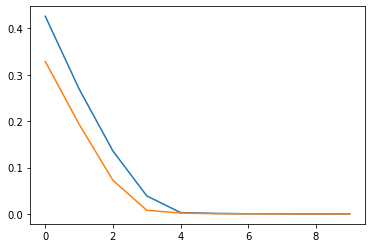

7/7 [==============================] - 0s 3ms/step - loss: 5.0709e-05 - mae: 0.0060
loss= 5.070853512734175e-05
mae= 0.005988238845020533


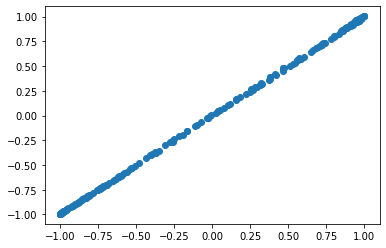

In [50]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## GRU

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 128)               50304     
                                                                 
 flatten_13 (Flatten)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 51,605
Trainable params: 51,605
Non-trainable params: 0
_________________________________________________________________


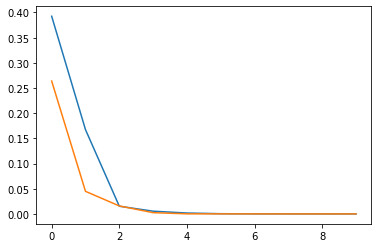

7/7 [==============================] - 0s 3ms/step - loss: 2.8512e-05 - mae: 0.0044
loss= 2.8512180506368168e-05
mae= 0.0043733613565564156


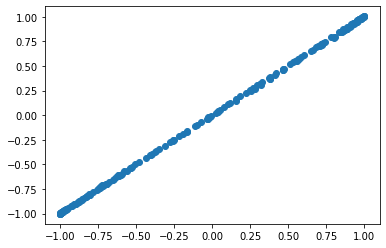

In [51]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(GRU(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + LSTM

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 256)              133120    
 nal)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 10)                2570      
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 135,701
Trainable params: 135,701
Non-trainable params: 0
_________________________________________________________________


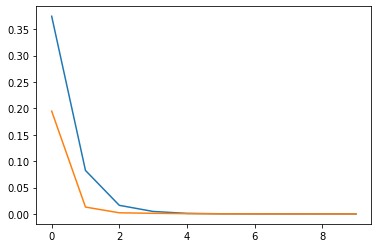

7/7 [==============================] - 0s 4ms/step - loss: 3.3681e-05 - mae: 0.0044
loss= 3.3681149943731725e-05
mae= 0.004381863866001368


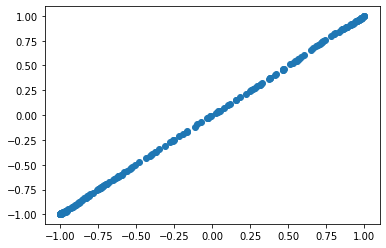

In [52]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(LSTM(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + GRU

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 256)              100608    
 nal)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                2570      
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 103,189
Trainable params: 103,189
Non-trainable params: 0
_________________________________________________________________


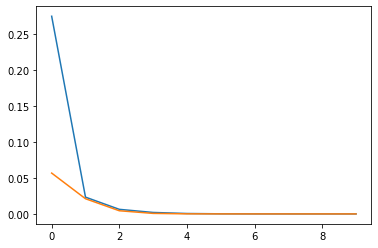

7/7 [==============================] - 0s 4ms/step - loss: 1.4523e-05 - mae: 0.0029
loss= 1.4522660421789624e-05
mae= 0.0028530515264719725


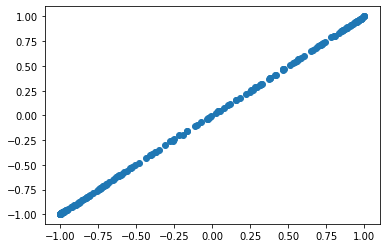

In [53]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(GRU(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## stacked

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 flatten_16 (Flatten)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 199,445
Trainable params: 199,445
Non-trainable params: 0
_________________________________________________________________


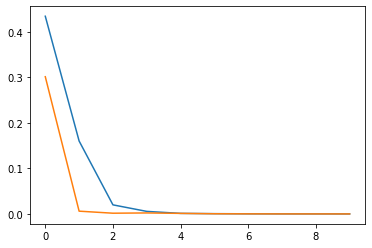

7/7 [==============================] - 0s 4ms/step - loss: 1.6610e-04 - mae: 0.0102
loss= 0.00016609957674518228
mae= 0.01021925825625658


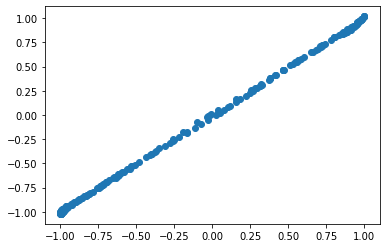

In [54]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 5, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 conv1d_9 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 32)            0         
 1D)                                                 

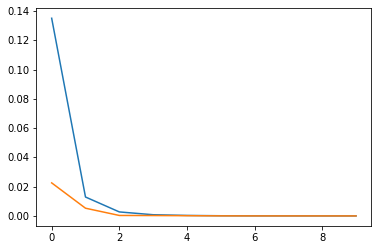

7/7 [==============================] - 0s 3ms/step - loss: 1.0969e-05 - mae: 0.0027
loss= 1.096879623219138e-05
mae= 0.0026705118361860514


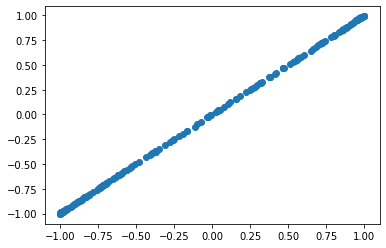

In [55]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape
1

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN + LSTM

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 5, 32)             128       
                                                                 
 conv1d_11 (Conv1D)          (None, 5, 32)             3104      
                                                                 
 lstm_11 (LSTM)              (None, 128)               82432     
                                                                 
 flatten_18 (Flatten)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 10)                1290      
                                                                 
 dense_42 (Dense)            (None, 1)                 11        
                                                                 
Total params: 86,965
Trainable params: 86,965
Non-tra

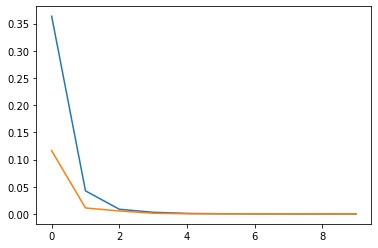

7/7 [==============================] - 0s 4ms/step - loss: 1.3512e-04 - mae: 0.0095
loss= 0.0001351181126665324
mae= 0.009541586972773075


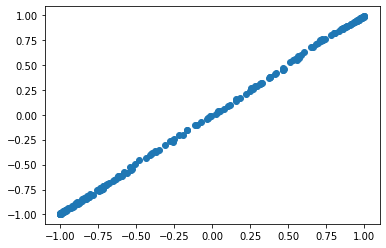

In [56]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape
1

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()